In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, roc_auc_score
import pandas as pd

In [21]:
import pickle

# Load data from the pickle file
with open('data.pickle', 'rb') as f:
    X_fit, y_fit, X_test,y_test = pickle.load(f)


## Random forest default

RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

In [22]:
# Initialize random forest model with default parameters
rf= RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_fit, y_fit)

# Predict on the testing data
y_pred_rf = rf.predict(X_test)

# Calculate accuracy on test data
test_accuracy = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8544261811749098


In [23]:
accuracy_rf_1 = accuracy_score(y_test, y_pred_rf)
recall_rf_1 = recall_score(y_test, y_pred_rf)
precision_rf_1 = precision_score(y_test, y_pred_rf)
f1_rf_1 = f1_score(y_test, y_pred_rf)
roc_rf_1 = roc_auc_score(y_test, y_pred_rf)

In [24]:
print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rf)))
print()
print("Classification report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression accuracy score with all the features: 0.8544

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     10230
           1       0.74      0.63      0.68      3337

    accuracy                           0.85     13567
   macro avg       0.81      0.78      0.79     13567
weighted avg       0.85      0.85      0.85     13567



In [25]:
models = [('Random F_defult_all features', accuracy_rf_1, recall_rf_1, precision_rf_1, f1_rf_1, roc_rf_1)]

df_rand_for = pd.DataFrame(models, columns = ['Model', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)', 'AUC'])

df_rand_for

,Model,Accuracy (%),Recall (%),Precision (%),F1 (%),AUC
0,Random F_defult_all features,0.854426,0.631705,0.738612,0.680989,0.779391


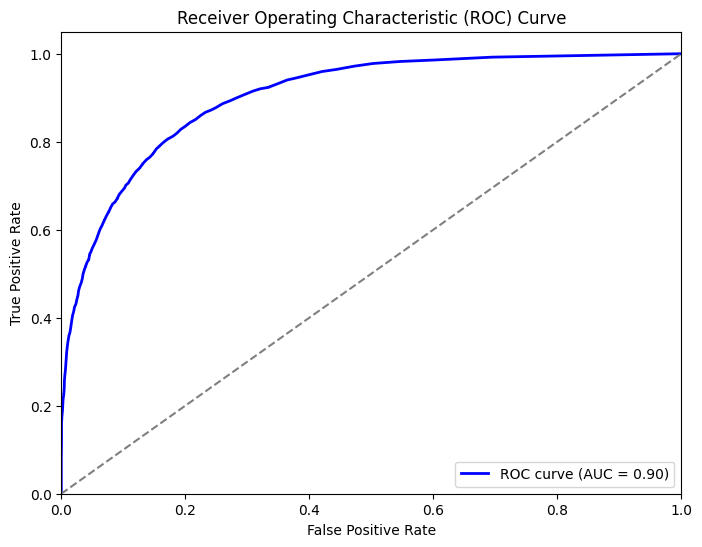

In [26]:
# Calculate probabilities of the positive class
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


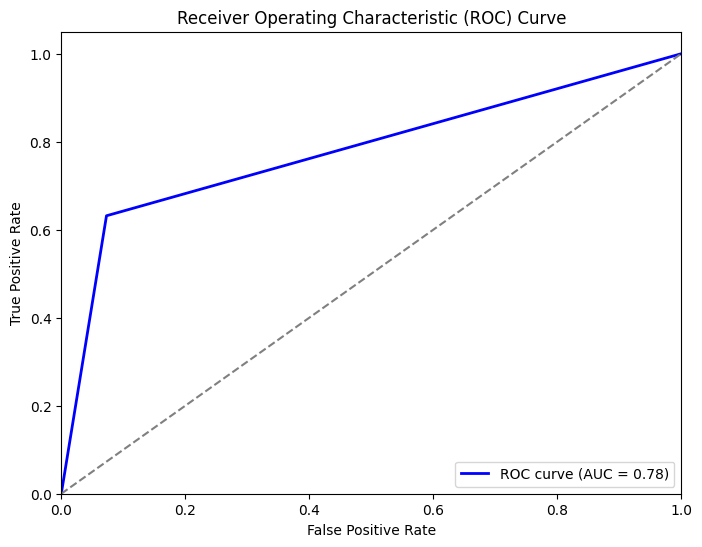

In [27]:
# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()